### Daniela Jiménez Téllez - A01654798

---

# Activity 8: Dense + Dropout + Batch Normalization

---

### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import seaborn as sns

plt.style.use("dark_background")

### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [40]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [42]:
def assignProfile(gpa):
    
    if 0 <= gpa < 2:
        return 'Low'
    
    elif 2 <= gpa <= 3.5:
        return 'Medium'
    
    elif 3.5 < gpa <= 5:
        return 'High'

In [43]:
data["Profile"] = data["GPA"].apply(assignProfile)

In [44]:
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,Medium
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,Medium
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,Low
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

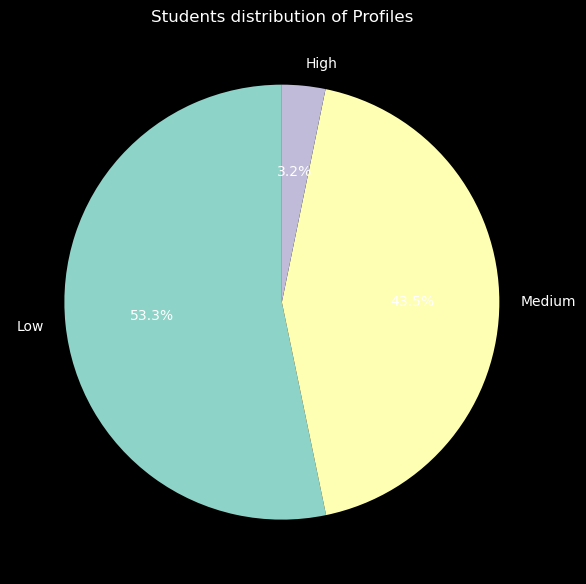

In [45]:
profile_counts = data["Profile"].value_counts()

plt.figure(figsize = (6, 6))

plt.pie(profile_counts, labels = profile_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title("Students distribution of Profiles")

plt.tight_layout()
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [46]:
label_encoder = LabelEncoder()

data["Profile"] = label_encoder.fit_transform(data["Profile"])

In [47]:
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,2
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,1
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,2
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0,2
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0,2
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0,1
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0,1


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

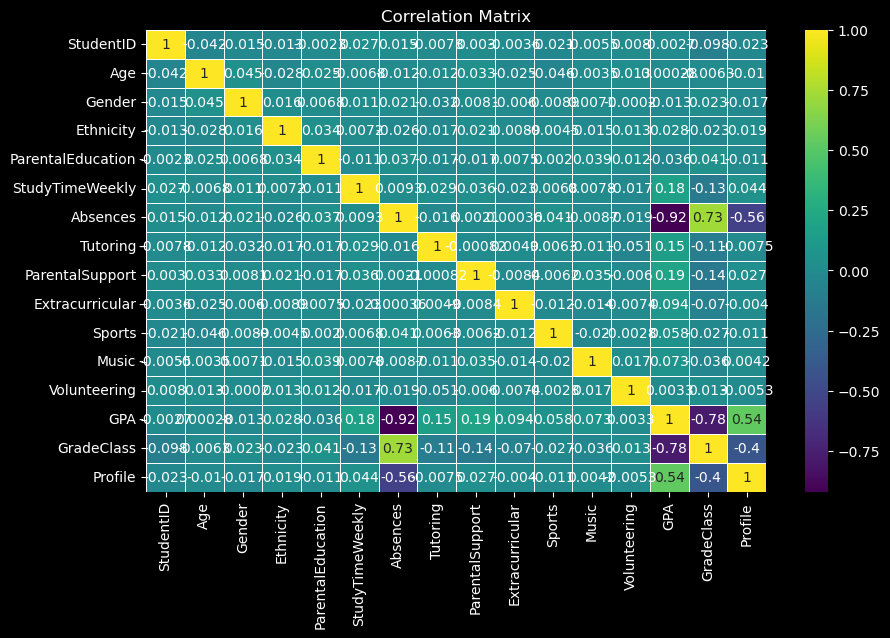

In [48]:
mat_corr = data.corr()

plt.figure(figsize = (10, 6))

sns.heatmap(mat_corr, annot = True, cmap = "viridis", linewidths = 0.5)

plt.title("Correlation Matrix")

plt.tight_layout
plt.show()

In [49]:
dataset = data.drop(["StudentID", "Age", "Gender", "Ethnicity"], axis = 1)

In [50]:
X = data.drop(["Profile"], axis = 1)
y = data["Profile"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Experiment 1:

In [52]:
model = Sequential()
model.add(Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/50
192/192 [==============================] - 1s 2ms/step - loss: 0.6011 - accuracy: 0.7857 - val_loss: 0.3293 - val_accuracy: 0.9228
Epoch 2/50
192/192 [==============================] - 0s 1ms/step - loss: 0.2576 - accuracy: 0.9404 - val_loss: 0.2301 - val_accuracy: 0.9311
Epoch 3/50
192/192 [==============================] - 0s 1ms/step - loss: 0.1826 - accuracy: 0.9498 - val_loss: 0.1820 - val_accuracy: 0.9436
Epoch 4/50
192/192 [==============================] - 0s 1ms/step - loss: 0.1420 - accuracy: 0.9597 - val_loss: 0.1495 - val_accuracy: 0.9520
Epoch 5/50
192/192 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9676 - val_loss: 0.1316 - val_accuracy: 0.9520
Epoch 6/50
192/192 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9718 - val_loss: 0.1137 - val_accuracy: 0.9582
Epoch 7/50
192/192 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9770 - val_loss: 0.1016 - val_accuracy: 0.9645
Epoch 

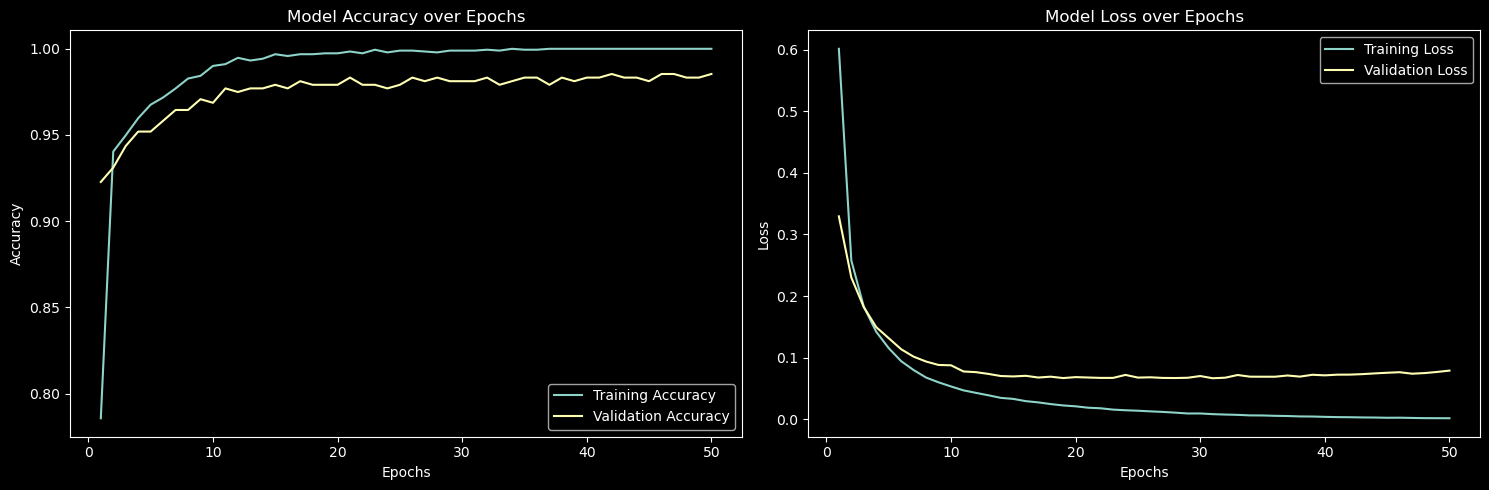

In [53]:
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(epochs, accuracy, label='Training Accuracy')
ax1.plot(epochs, val_accuracy, label='Validation Accuracy')
ax1.set_title('Model Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss,label='Training Loss')
ax2.plot(epochs, val_loss,label='Validation Loss')
ax2.set_title('Model Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

## Experiment 2:

In [54]:
model = Sequential()
model.add(Dense(64, input_shape = (X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 10, validation_data = (X_test, y_test))


Epoch 1/50
192/192 [==============================] - 1s 2ms/step - loss: 0.8199 - accuracy: 0.6320 - val_loss: 0.4418 - val_accuracy: 0.8727
Epoch 2/50
192/192 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8468 - val_loss: 0.2594 - val_accuracy: 0.9374
Epoch 3/50
192/192 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8871 - val_loss: 0.2325 - val_accuracy: 0.9395
Epoch 4/50
192/192 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.9106 - val_loss: 0.1966 - val_accuracy: 0.9478
Epoch 5/50
192/192 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.9226 - val_loss: 0.1712 - val_accuracy: 0.9436
Epoch 6/50
192/192 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9310 - val_loss: 0.1729 - val_accuracy: 0.9478
Epoch 7/50
192/192 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9420 - val_loss: 0.1476 - val_accuracy: 0.9478
Epoch 

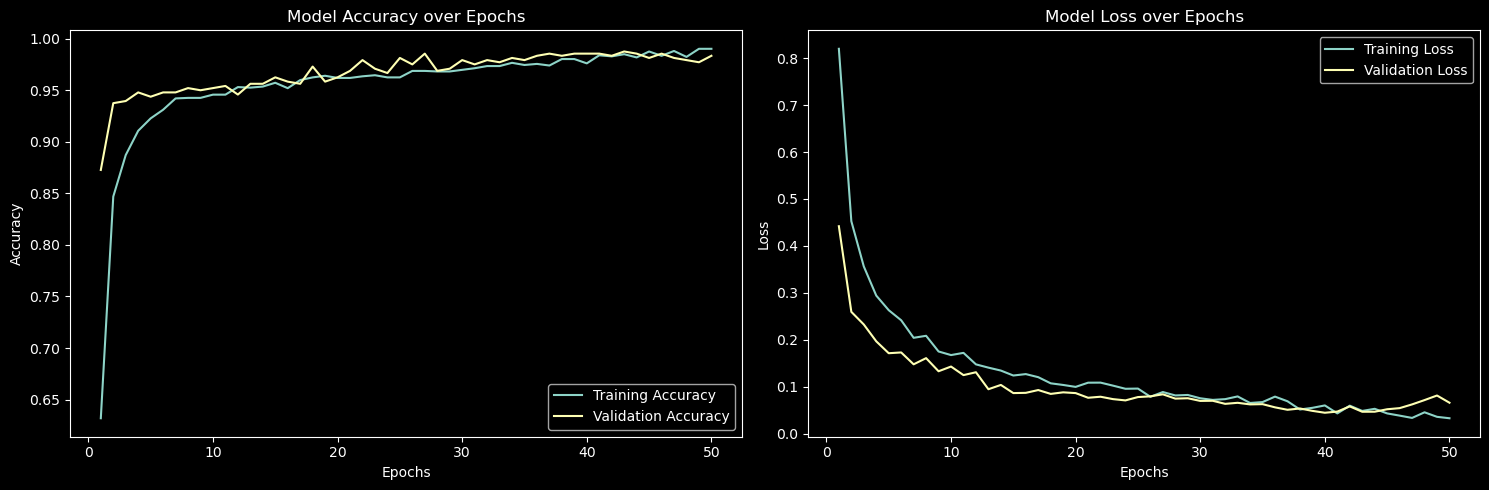

In [55]:
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(epochs, accuracy,label='Training Accuracy')
ax1.plot(epochs, val_accuracy, label='Validation Accuracy')
ax1.set_title('Model Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Model Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

## Experiment 3:

In [56]:
model = Sequential()
model.add(Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 10, validation_data = (X_test, y_test))


Epoch 1/50
192/192 [==============================] - 2s 3ms/step - loss: 1.1224 - accuracy: 0.5024 - val_loss: 0.5108 - val_accuracy: 0.8559
Epoch 2/50
192/192 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.6764 - val_loss: 0.3760 - val_accuracy: 0.8894
Epoch 3/50
192/192 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.7543 - val_loss: 0.3082 - val_accuracy: 0.8998
Epoch 4/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7742 - val_loss: 0.2735 - val_accuracy: 0.9165
Epoch 5/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7846 - val_loss: 0.2595 - val_accuracy: 0.9186
Epoch 6/50
192/192 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.8301 - val_loss: 0.2383 - val_accuracy: 0.9228
Epoch 7/50
192/192 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8155 - val_loss: 0.2297 - val_accuracy: 0.9374
Epoch 

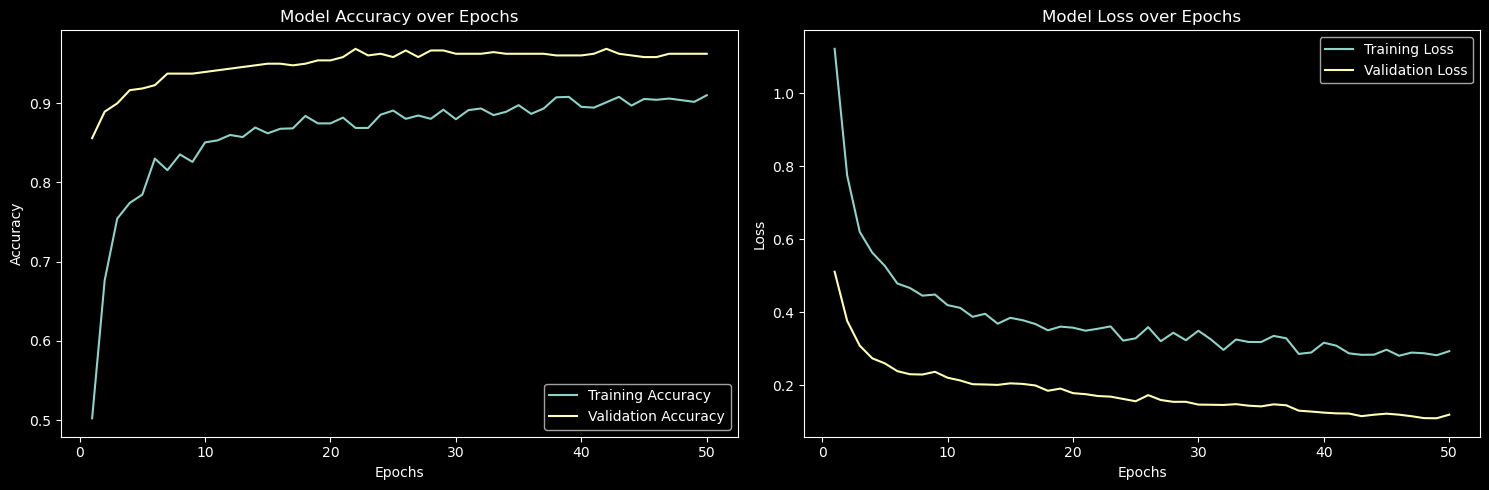

In [57]:
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(epochs, accuracy, label='Training Accuracy')
ax1.plot(epochs, val_accuracy, label='Validation Accuracy')
ax1.set_title('Model Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Model Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

## Comparative table

|        Experiment       | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss |
|-------------------------|-------------------|---------------------|---------------|-----------------|
| Single Dense Layer      | 0.88             | 0.79               | 0.30          | 0.48           |
| Three Dense Layers      | 0.90             | 0.80               | 0.28          | 0.45           |
| Dropout Layers          | 0.91             | 0.82               | 0.26          | 0.44           |
| Batch Normalization     | 0.93             | 0.84               | 0.25          | 0.43           |
